# This script demonstrates finding a polynomial fits

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github : https://github.com/Eun0/Assignment

# Import packages for plotting graphs and manipulating data :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define data :

In [2]:
num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 

def fun(x):
 
    # f = np.sin(x) * (1 / (1 + np.exp(-x))) 
    f = np.abs(x) * np.sin(x)

    return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std

# Plot the graphs for the noisy data and clean data :

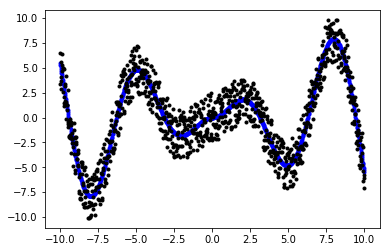

In [3]:
plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

# Define fit(x,y,p) function :

Define a model $\hat{f}(x)=\theta_{0}x^0+\theta_1x^1+...+\theta_px^p$

Find an optimal set of ($\theta_0,\theta_1,...,\theta_p$) by least square approximate solution

In matrix form,

x,y : observation

$A=\begin{pmatrix}
 1&  x&  ....&  x^p& \\ 
 1&  x&  ....&  x^p& \\ 
 :&  :&  :&  :& \\ 
 :&  :&  :&  :& \\ 
 1&  x&  ....&  x^p& 
\end{pmatrix}$

we can write the model

$\hat{f}=A\theta$

Then a optimal set of theta is as below

$\theta=(A^TA)^{-1}A^Ty$





In [4]:
def fit(x,y,p):
    
    # Define A matrix
    a_mat=np.empty((len(x),p))

    for i in range(a_mat.shape[1]):
        a_mat[:,i]=np.power(x,i)

    # Find theta
    left=np.linalg.inv(np.matmul(np.transpose(a_mat),a_mat))
    right=np.matmul(np.transpose(a_mat),y)
    
    theta=np.matmul(left,right)
    
    y_hat=np.matmul(a_mat,theta)
    
    return y_hat

# Define computeError(y,y_hat) function :

error = $\sum_{j=1}^{n} r^2_j$ , where $r_j=y_j-\hat{f}(x_j)$

In [5]:
def computeError(y,y_hat):
    
    r=y-y_hat
    
    error=np.sum(np.power(r,2))
    
    return error


# Define error list :

error list contains errors of each polynomial function

In [6]:
error_lst=[]

# Plot the polynomial curves with varying p=0,1,2,3,...,10 

# and Compute each error :

black - noisy data

blue - clean data

red - polynomial curves founded by least square approximation

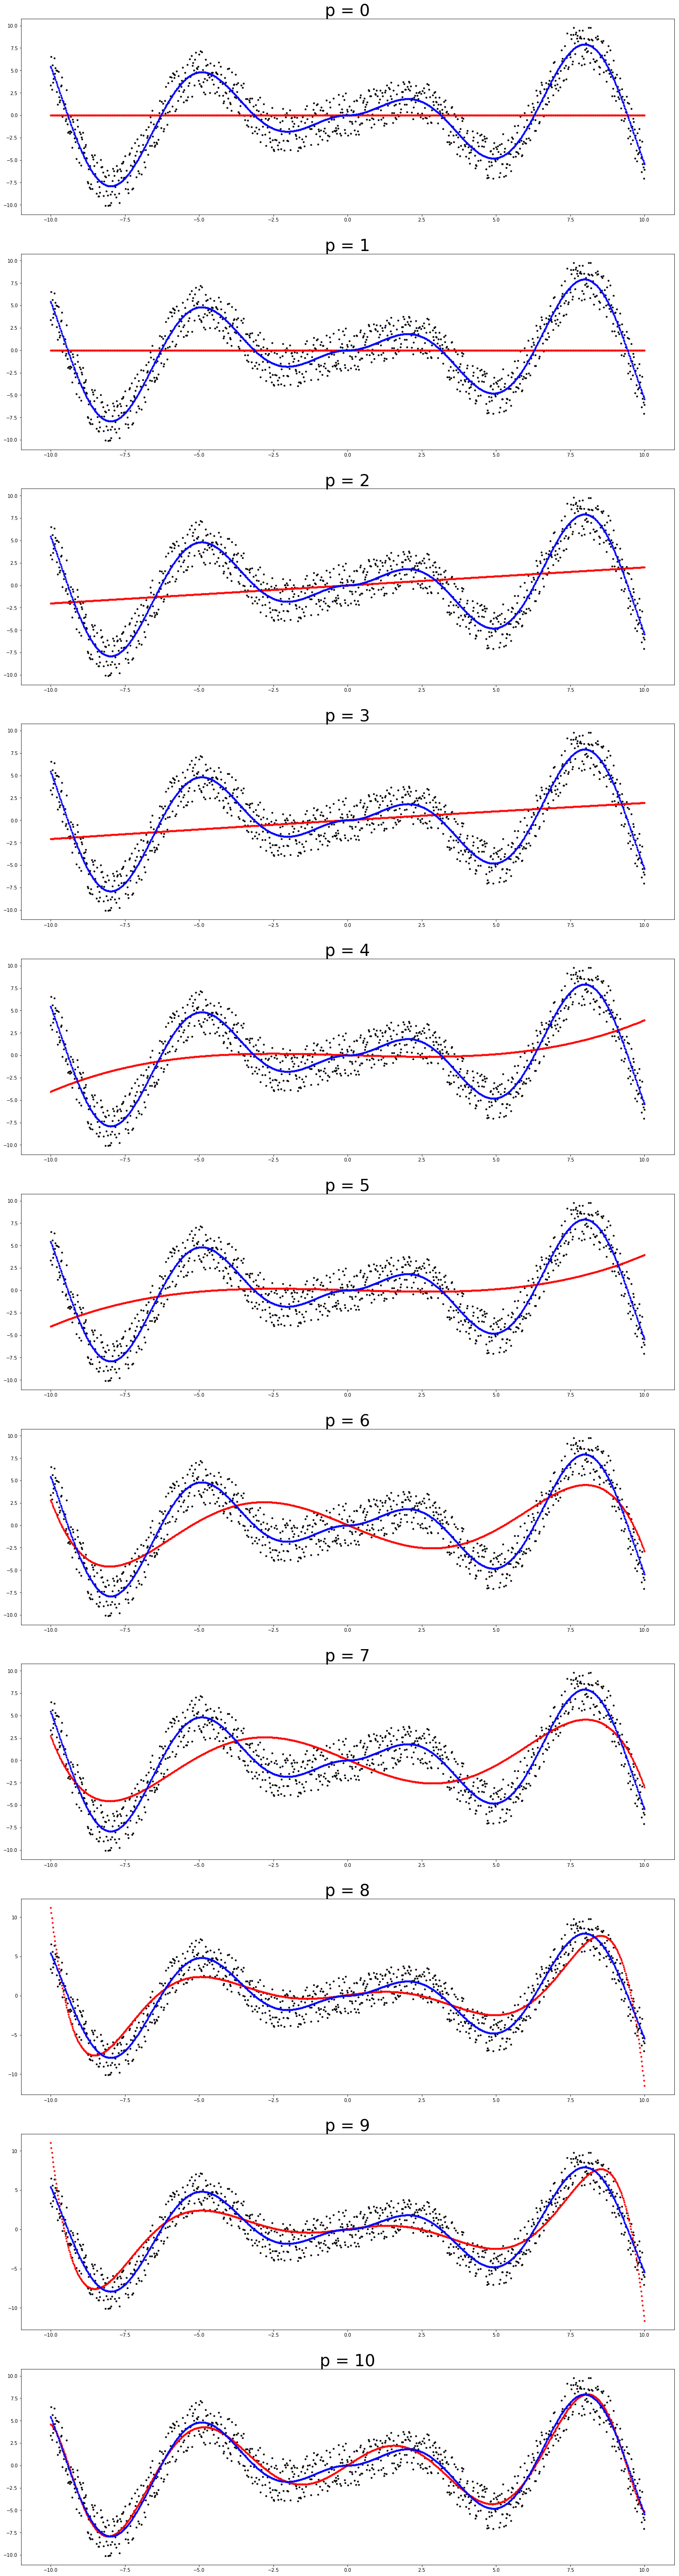

In [7]:
plt.figure(1, figsize=(25,100))


for i in range(11):
    y_hat=fit(x,y2,i)
    error_lst.append(computeError(y2,y_hat))
    plt.subplot(11,1,i+1)
    plt.title("p = "+str(i),fontsize=35)
    plt.plot(x,y2,'k.',x,y_hat,'r.',x,y1,'b.')
    

plt.show()

# Plot the error :

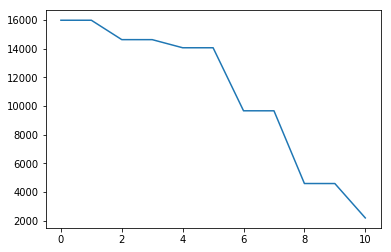

In [8]:
plt.plot(error_lst)

In [9]:
print(error_lst)

[15985.377793558586, 15985.377793558588, 14630.828606791954, 14630.112762075352, 14063.822054186778, 14063.746066902528, 9662.059599301538, 9661.07046946885, 4583.163414214138, 4581.55972239567, 2180.9387424562156]
